# Business Problem:-

# Given the mentee information such as Mentee Major topics,help topics and expertise and also the Mentor's information such as Mentor Major topics,help topics and expertise can we leverage Machine Learning techniques to find relationship between Mentor and mentee and state if a Mentor is a right match for the Mentee.
# In Machine Learning terms this is a Binary cLassification Problem we are dealing with.

# Reading the dataset:-

In [4]:
import pandas as pd
data=pd.read_csv(r"C:\Users\91996\Desktop\pg_recommendation_data.csv")

In [2]:
data.head()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
0,['Accounting and Financial Management'],"['Life Skills', 'Cover Letter Review', 'Career...",['Accounting'],['Accounting and Financial Management'],"['Parenting vs. Career', 'Career / Industry Tr...","['Finance', 'Accounting']",1
1,['Information Systems Management'],"['Working Overseas', 'Life Skills', 'Startups'...","['Food & Restaurants', 'Law', 'Computer - IT S...","['Information Systems Management', 'Project Ma...","['Leadership Skills', 'Working Overseas', 'Per...","['Trade (Wholesale)', 'Government / Public Adm...",0
2,"['Cybersecurity Technology', 'Computer Network...","['Leadership Skills', 'Personal and Profession...","['Military & Defense', 'Technology', 'Computer...","['Cybersecurity Technology', 'Computer Network...","['Management', 'Resume / CV Review', 'Career /...","['Government / Public Admin', 'Computer - IT S...",1
3,['Masters of Human Resources Management'],[],['Human Resources'],['Business Administration'],"['Leadership Skills', 'Life Skills', 'Intervie...","['Human Resources', 'Advertising / Marketing',...",0
4,['Sociology'],"['Leadership Skills', 'Life Skills', 'Manageme...",['Healthcare'],['Business Administration'],"['Leadership Skills', 'Working Overseas', 'Per...","['Human Resources', 'Computer - Hardware', 'Fi...",0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48882 entries, 0 to 48881
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   mentee_major        48882 non-null  object
 1   mentee_help_topics  48882 non-null  object
 2   mentee_experitse    48882 non-null  object
 3   mentor_major        48882 non-null  object
 4   mentor_help_topics  48882 non-null  object
 5   mentor_experitse    48882 non-null  object
 6   final_match         48882 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 2.6+ MB


# EDA(Exploratory Data Analysis)

In [4]:
import re

# 1. Important Insights about Students Major

In [250]:
attribute=data.mentee_major
preprocess(attribute)

[('Computer Networks and Cybersecurity', 4413),
 ('Business Administration', 3855),
 ('Psychology', 1946),
 ('Unknown_Subject', 1521),
 ('English', 1500),
 ('Political Science', 1364),
 ('Cybersecurity Management and Policy', 1344),
 ('Computer Science', 1342),
 ('Cybersecurity Technology', 1307),
 ('History', 1302),
 ('Health Services Management', 1299),
 ('Management: Human Resource Management', 1233),
 ('Accounting and Financial Management', 1232),
 ('Information Systems Management', 1161),
 ('Accounting', 1141),
 ('Sociology', 1109),
 ('Human Resource Management', 1064),
 ('General Studies', 1018),
 ('Criminal Justice', 969),
 ('General', 934),
 ('International Relations', 925),
 ('Project Management Essentials with CAPM® Prep in Project Management', 886),
 ('Health Informatics Administration', 859),
 ('Finance', 852),
 ('Environmental Management', 737),
 ('Business', 703),
 ('psychology', 671),
 ('Software Development and Security', 614),
 ('MBA', 601),
 ('Marketing', 590),
 ('Dig

In [153]:
top_suject_names=[]
top_subject_counts=[]
for i in range(50):
    top_suject_names.append(c.most_common()[:50][i][0])
    top_subject_counts.append(c.most_common()[:50][i][1])

In [160]:
import numpy as np
bins=np.asarray(top_subject_counts)

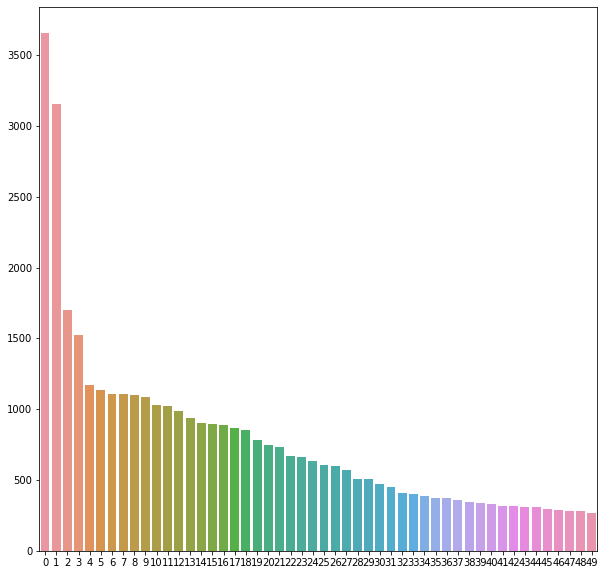

In [174]:
fig_dims = (10, 10)
y=[i for i in range(50)]
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=y,y=top_subject_counts)

# Top 3 subjects students have majors in are 'Computer Networks and Cybersecurity,''Business Administration' and 'Psychology

# 2. Important Insights about mentee_help_topics

In [225]:
def preprocess(attribute):
    major_subjects=list(attribute)
    cleaned_subjects=[]
    for j in major_subjects:
        i=j.replace("[]","Unknown_Subject")
        i=i.replace("]","")
        i=i.replace("'","")
        i=i.strip('""')
        i=i.replace("[","")
        i=i.strip()
        cleaned_subjects.append(i)
    cleaned_subjects_string=""
    for i in cleaned_subjects:
        cleaned_subjects_string=cleaned_subjects_string+i.strip()+","
       
    split=cleaned_subjects_string.split(",")   
    split_no_spaces=[]
    for i in split:
        split_no_spaces.append(i.strip())
    c=Counter(split_no_spaces)
    top=c.most_common()[:50]
    
    
    return top

In [226]:
attribute=data.mentee_help_topics
preprocess(attribute)

[('Unknown_Subject', 16082),
 ('Career Planning', 14281),
 ('Career / Industry Trends', 12246),
 ('General Networking', 11707),
 ('Networking / Introductions to others in my field', 8472),
 ('Interviewing Tips', 7908),
 ('Career Change Advice', 7587),
 ('Leadership Skills', 7527),
 ('Resume / CV Review', 7305),
 ('Job Search Strategies', 7146),
 ('Personal and Professional Development', 6583),
 ('How to use CareerQuest and more', 6059),
 ('Management', 6042),
 ('Internship Search Strategies', 5804),
 ('Job Fair Information and Preparation', 5508),
 ('Work-life balance', 4129),
 ('Informational / Mock Interviews', 4094),
 ('Life Skills', 4065),
 ('Cover Letter Review', 3446),
 ('Transition to Civilian Career', 3155),
 ('Working Overseas', 2649),
 ('Startups', 2625),
 ('Transitioning to life after UMUC', 2102),
 ('Corporate/Office Politics', 1909),
 ('Parenting vs. Career', 1768),
 ('Hosting someone at my work (job shadowing)', 727),
 ('', 1)]

# Most of the mentee help topics are regarding career Planning and Industrial Trend and how to Crack an Interview.

# 3 Important Insights about Mentee_expertise

In [229]:
attribute=data.mentee_experitse
preprocess(attribute)

[('Computer - IT Services', 12085),
 ('Cybersecurity', 11814),
 ('Business Services', 9144),
 ('Government / Public Admin', 8876),
 ('Human Resources', 7782),
 ('Computer - Software', 7309),
 ('Healthcare', 7295),
 ('Technology', 6968),
 ('Communications / Media', 5996),
 ('Military & Defense', 5453),
 ('Advertising / Marketing', 5324),
 ('Finance', 5263),
 ('Computer - Hardware', 5242),
 ('Entrepreneurship / Start-Ups', 5131),
 ('Consulting', 5011),
 ('Education', 4327),
 ('Social Services', 4324),
 ('Law Enforcement & Security', 4207),
 ('Accounting', 4139),
 ('Non-Profit / Philanthropy', 4053),
 ('Unknown_Subject', 3826),
 ('International Affairs & Development', 3636),
 ('Healthcare Policy', 3572),
 ('Public Policy / Public Affairs', 3387),
 ('Entrepreneurship - Social', 3206),
 ('Aerospace and Defense', 2835),
 ('Real Estate', 2658),
 ('Law', 2583),
 ('Travel & Tourism', 2572),
 ('Biotechnology', 2468),
 ('Engineering', 2170),
 ('Telecommunications', 2133),
 ('Arts', 2085),
 ('Envi

# It is stated from the data that Computer - IT Services','Cybersecurity'a and 'Business Services' are the top 3 experise of a mentee.

# 4.Important Insights about mentor_major:-

In [230]:
attribute=data.mentor_major
preprocess(attribute)

[('Business Administration', 6727),
 ('Computer Networks and Cybersecurity', 4300),
 ('Information Systems Management', 2664),
 ('Cybersecurity Technology', 2613),
 ('MBA', 2364),
 ('Psychology', 2311),
 ('Cybersecurity Management and Policy', 1787),
 ('Human Resource Management', 1627),
 ('Computer Science', 1606),
 ('Accounting', 1475),
 ('Criminal Justice', 1390),
 ('Management', 1341),
 ('General', 1326),
 ('Business', 1311),
 ('Health Services Management', 1198),
 ('Unknown_Subject', 1129),
 ('General Studies', 1124),
 ('Management: Human Resource Management', 1081),
 ('Cybersecurity', 1074),
 ('Accounting and Financial Management', 945),
 ('Marketing', 916),
 ('Finance', 895),
 ('Business Administration and Management', 870),
 ('Political Science', 765),
 ('Business Management', 765),
 ('Sociology', 742),
 ('Environmental Management', 706),
 ('Management Studies', 697),
 ('Legal Studies', 686),
 ('Data Analytics', 670),
 ('Cyber Security', 618),
 ('English', 570),
 ('Health Care 

# Top 3 subjects of mentor major are Business Administration', 'Computer Networks and Cybersecurity' and 'Information Systems Management'

# 5.Important Insights about mentor_help_topics:-

In [231]:
attribute=data.mentor_help_topics
preprocess(attribute)

[('Leadership Skills', 23570),
 ('Career / Industry Trends', 22218),
 ('Management', 20787),
 ('Personal and Professional Development', 20607),
 ('Interviewing Tips', 19002),
 ('Life Skills', 18592),
 ('Resume / CV Review', 18191),
 ('Work-life balance', 17113),
 ('Networking / Introductions to others in my field', 17050),
 ('Corporate/Office Politics', 13731),
 ('Unknown_Subject', 12763),
 ('Transitioning to life after UMUC', 9840),
 ('Transition to Civilian Career', 9036),
 ('Parenting vs. Career', 9020),
 ('Working Overseas', 8849),
 ('Startups', 8089),
 ('Hosting someone at my work (job shadowing)', 5140),
 ('General Networking', 1102),
 ('Job Search Strategies', 971),
 ('Career Planning', 571),
 ('Career Change Advice', 544),
 ('Cover Letter Review', 433),
 ('Informational / Mock Interviews', 327),
 ('Job Fair Information and Preparation', 253),
 ('Internship Search Strategies', 152),
 ('How to use CareerQuest and more', 76),
 ('', 1)]

# Leadership Skills','Career / Industry Trends' and 'Management' are the top 3 mentor_help_topics

# 6.Important Insights about mentor_experitse:-

In [232]:
attribute=data.mentor_experitse
preprocess(attribute)

[('Computer - IT Services', 18223),
 ('Government / Public Admin', 17971),
 ('Business Services', 17620),
 ('Technology', 16768),
 ('Cybersecurity', 15927),
 ('Education', 14246),
 ('Computer - Software', 14127),
 ('Human Resources', 14117),
 ('Consulting', 13972),
 ('Military & Defense', 13855),
 ('Healthcare', 12725),
 ('Computer - Hardware', 12010),
 ('Communications / Media', 11617),
 ('Finance', 11409),
 ('Non-Profit / Philanthropy', 11270),
 ('Telecommunications', 10737),
 ('Entrepreneurship / Start-Ups', 10723),
 ('Advertising / Marketing', 10541),
 ('Accounting', 9330),
 ('Healthcare Policy', 9282),
 ('Social Services', 8761),
 ('Entrepreneurship - Social', 8169),
 ('Travel & Tourism', 7900),
 ('Law Enforcement & Security', 7878),
 ('Public Policy / Public Affairs', 7834),
 ('International Affairs & Development', 7488),
 ('Insurance', 7263),
 ('Aerospace and Defense', 7201),
 ('Retail', 7189),
 ('Sports & Recreation', 7169),
 ('Transportation', 7112),
 ('Real Estate', 7086),
 (

# Top 3 mentor expertise are Computer - IT Services,'Government / Public Admin' and 'Business Services

# Let us compare Mentee_help_topics and MEntor_help_topics

In [233]:
attribute=data.mentee_help_topics
mentee_help=preprocess(attribute)

In [234]:
attribute=data.mentor_help_topics
mentor_help=preprocess(attribute)

In [245]:
mentee_help_subjects=[]
mentor_help_subjects=[]
for i in range(26):
    mentee_help_subjects.append(mentee_help[i][0])
    mentor_help_subjects.append(mentor_help[i][0])

In [248]:
for i in mentee_help_subjects:
    if i not in mentor_help_subjects:
        print(i)

# This shows that every mentee help topics are covered by Mentor

# Let us comapare Mentee_mojor and Mentor_major for top 50 subjects

In [251]:
attribute=data.mentee_major
mentee_major_subjects=preprocess(attribute)

In [253]:
attribute=data.mentor_major
mentor_major_subjects=preprocess(attribute)

In [256]:
mentee_sub=[i[0] for i in mentee_major_subjects]
mentor_sub=[i[0] for i in mentor_major_subjects]

In [258]:
for i in mentee_sub :
    if i not in mentor_sub:
        print(i)

International Relations
Project Management Essentials with CAPM® Prep in Project Management
psychology
Software Development and Security
Management: Criminal Justice Management
Social Science
Homeland Security Management
Health Information Management
business administration
Computer Networking
Communications


# The company needs to assign more mentors with the following majors:-

# International Relations
# Project Management Essentials with CAPM® Prep in Project Management
# psychology
# Software Development and Security
# Management: Criminal Justice Management
# Social Science
# Homeland Security Management
# Health Information Management
# business administration
# Computer Networking
# Communications

# Let us compare Mentee Specialization and Mentor Specialiazation

In [259]:
attribute=data.mentee_experitse
mentee_specialization=preprocess(attribute)

In [260]:
attribute=data.mentor_experitse
mentor_specialization=preprocess(attribute)

In [261]:
mentee_spec_subjects=[i[0] for i in mentee_specialization]
mentor_spec_subjects=[i[0] for i in mentor_specialization]

In [262]:
for i in mentee_spec_subjects:
    if i not in mentor_spec_subjects:
        print(i)

Museums & Libraries
Pharmaceuticals
Internet Law


# The company needs to hire more mentor who have specializations in :-
# 1.Museums & Libraries
# 2.Pharmaceuticals
# 3.Internet Law

# Exploring relationship between attributes when the mentor and mentee doesnot match.

# Exploring the dataset where Mentee and Mentor doesnot match.

In [376]:
invalid_match=data[data.final_match==0]

In [377]:
invalid_match.head()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
1,['Information Systems Management'],"['Working Overseas', 'Life Skills', 'Startups'...","['Food & Restaurants', 'Law', 'Computer - IT S...","['Information Systems Management', 'Project Ma...","['Leadership Skills', 'Working Overseas', 'Per...","['Trade (Wholesale)', 'Government / Public Adm...",0
3,['Masters of Human Resources Management'],[],['Human Resources'],['Business Administration'],"['Leadership Skills', 'Life Skills', 'Intervie...","['Human Resources', 'Advertising / Marketing',...",0
4,['Sociology'],"['Leadership Skills', 'Life Skills', 'Manageme...",['Healthcare'],['Business Administration'],"['Leadership Skills', 'Working Overseas', 'Per...","['Human Resources', 'Computer - Hardware', 'Fi...",0
5,['English'],[],"['Computer - IT Services', 'Computer - Hardwar...",[],"['Leadership Skills', 'Startups', 'Life Skills...","['Computer - IT Services', 'Cybersecurity', 'C...",0
6,"['Business Administration', 'Sociology', 'Proj...",[],"['Government / Public Admin', 'Human Resources...","['', 'Cybersecurity Policy', 'Management Studi...","['Leadership Skills', 'Working Overseas', 'Per...",['Government / Public Admin'],0


# Question-->Is less common subjects between the mentee and the assigned mentor help topics the reason behind teh mismatch?

In [378]:
def cleaned_attributes(attribute):
    new_mentee_help_topics_clened=[]
    for i in attribute:
        i=i.replace("[]","Unknown_Subject")
        i=i.replace("[","")
        i=i.replace("]","")
        new_mentee_help_topics_clened.append(i)
    mentee_help_list=[]
    for i in range(len(new_mentee_help_topics_clened)):
        mentee_help_list.append(list(new_mentee_help_topics_clened[i].split(",")))
    return mentee_help_list

In [379]:
invalid_match['mentee_help_cleaned']=(cleaned_attributes(invalid_match.mentee_help_topics))
invalid_match['mentor_help_cleaned']=(cleaned_attributes(invalid_match.mentor_help_topics))

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [398]:
def difference(list1,list2):
    differences_in_help_topics=[]
    for index in range(24466):
        c=0
        for individual_subjects in list1[index]:
            if (individual_subjects not in list2[index]):
                c+=1
        differences_in_help_topics.append(c)
    return differences_in_help_topics

In [ ]:
list1=cleaned_attributes(invalid_match.mentee_help_topics)
list2=(cleaned_attributes(invalid_match.mentor_help_topics))

In [399]:
invalid_match['differences_in_help_topics']=difference(list1,list2)

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [400]:
invalid_match.differences_in_help_topics.value_counts()

1     12822
0      4297
2      1753
3      1492
4      1262
5       899
6       705
7       462
8       356
9       332
10       86
Name: differences_in_help_topics, dtype: int64

In [412]:
def missing_value_count(attribute):
    missing_values=0
    for i in invalid_match.mentee_help_cleaned:
           if(i==['Unknown_Subject']):
                missing_values+=1
    return missing_values

In [413]:
missing_value_count(invalid_match.mentee_help_cleaned)

12632

In [414]:
missing_value_count(invalid_match.mentor_help_cleaned)

12632

# Important Insight:- 22% of total mismatch rows are because mentor and mentee have upto  differences in help topics which range from 2-5 topics.
# There are maximum of 10 differences which affects  86 sudents.

# Question-->Is less common subjects between the mentee and the assigned mentor major topics the reason behind teh mismatch?

In [390]:
invalid_match['mentee_major_cleaned']=(cleaned_attributes(invalid_match.mentee_major))
invalid_match['mentor_major_cleaned']=(cleaned_attributes(invalid_match.mentor_major))

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [401]:
list1=cleaned_attributes(invalid_match.mentee_major)
list2=(cleaned_attributes(invalid_match.mentor_major))

In [402]:
invalid_match['differences_in_major_topics']=difference(list1,list2)

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [403]:
invalid_match.differences_in_major_topics.value_counts()

1     13587
2      4106
0      3686
3      1428
7       809
4       484
5       181
6       157
8        12
10       10
11        5
9         1
Name: differences_in_major_topics, dtype: int64

In [415]:
missing_value_count(invalid_match.mentee_major_cleaned)

12632

# Insight:- 26% of the mismatch between Mentor and mentee is because of the differences of their Major Subjects .Mentee having 1,2,3 and 7 different subjects than  menor's Major contribute to this .But why not 4,5,6 difference sin subjects affect more?
# This brings us to the conclusion that major of the student and Mentor is fluctuating  feature as compared to help topics.

# Question-->Is less common subjects between the mentee and the assigned mentor specialized topics the reason behind the mismatch?

In [406]:
invalid_match['mentee_expertise_cleaned']=(cleaned_attributes(invalid_match.mentee_experitse))
invalid_match['mentor_expertise_cleaned']=(cleaned_attributes(invalid_match.mentor_experitse))

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [407]:
list1=cleaned_attributes(invalid_match.mentee_experitse)
list2=(cleaned_attributes(invalid_match.mentor_experitse))

In [408]:
invalid_match['differences_in_expertise_topics']=difference(list1,list2)

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [411]:
invalid_match.differences_in_expertise_topics.value_counts()

1     9671
2     3076
0     2904
3     2155
4     1597
5     1181
6      924
9      562
7      550
10     492
11     453
8      440
14      73
19      62
16      58
12      51
13      44
15      42
18      36
17      32
23      17
21      14
22       8
25       7
20       7
46       1
30       1
26       1
45       1
41       1
38       1
27       1
24       1
42       1
31       1
Name: differences_in_expertise_topics, dtype: int64

In [417]:
missing_value_count(invalid_match.mentor_expertise_cleaned)

12632

# There are as many as 31 maximum differences between Mentor and Mentee expertise but these are actually outliers and most of the differences is between 2-6.

# Exploring the dataset where Mentee and Mentor  matches.

In [419]:
valid_matching=data[data.final_match==1]

In [420]:
valid_matching.head()

,mentee_major,mentee_help_topics,mentee_experitse,mentor_major,mentor_help_topics,mentor_experitse,final_match
0,['Accounting and Financial Management'],"['Life Skills', 'Cover Letter Review', 'Career...",['Accounting'],['Accounting and Financial Management'],"['Parenting vs. Career', 'Career / Industry Tr...","['Finance', 'Accounting']",1
2,"['Cybersecurity Technology', 'Computer Network...","['Leadership Skills', 'Personal and Profession...","['Military & Defense', 'Technology', 'Computer...","['Cybersecurity Technology', 'Computer Network...","['Management', 'Resume / CV Review', 'Career /...","['Government / Public Admin', 'Computer - IT S...",1
7,['Business Administration'],['Career Planning'],['Business Services'],"['Public Health ', 'Business Administration']",[],"['Business Services', 'Engineering', 'Retail']",1
12,['Psychology'],['Career Planning'],['Human Resources'],['Psychology'],"['Leadership Skills', 'Personal and Profession...","['Non-Profit / Philanthropy', 'Education']",1
13,['Distance Education and E-Learning (MDE): Dis...,"['Internship Search Strategies', 'Career Plann...",['Education'],"['BUSINESS ADMINISTRATION', 'General Managemen...","['Leadership Skills', 'Working Overseas', 'Per...","['Trade (Wholesale)', 'Transportation', 'Law',...",1


# Question-->Is less common subjects between the mentee and the assigned mentor help topics the reason behind the mismatch?

In [421]:
valid_matching['mentee_help_cleaned']=(cleaned_attributes(valid_matching.mentee_help_topics))
valid_matching['mentor_help_cleaned']=(cleaned_attributes(valid_matching.mentor_help_topics))

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [428]:
list1=cleaned_attributes(valid_matching.mentee_help_topics)
list2=(cleaned_attributes(valid_matching.mentor_help_topics))



In [433]:
def difference_valid(list1,list2):
    differences_in_help_topics=[]
    for index in range(24416):
        c=0
        for individual_subjects in list1[index]:
            if (individual_subjects not in list2[index]):
                c+=1
        differences_in_help_topics.append(c)
    return differences_in_help_topics

In [434]:
valid_matching['differences_in_help_topics']=difference_valid(list1,list2)

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [435]:
valid_matching.differences_in_help_topics.value_counts()

1     8019
0     3350
2     2507
3     2467
4     2106
5     1720
6     1321
7     1009
9      809
8      780
10     328
Name: differences_in_help_topics, dtype: int64

# Insight:-Its not that only invalid Mentor mentee have differences in help topics.Even valid Mentor Mentee have differences.

# Question-->Is less common subjects between the mentee and the assigned mentor major topics the reason behind the mismatch?

In [438]:
valid_matching['mentee_major_cleaned']=(cleaned_attributes(valid_matching.mentee_major))
valid_matching['mentor_major_cleaned']=(cleaned_attributes(valid_matching.mentor_major))

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [439]:
list1=cleaned_attributes(valid_matching.mentee_major)
list2=(cleaned_attributes(valid_matching.mentor_major))


In [440]:
valid_matching['differences_in_major_topics']=difference_valid(list1,list2)

valid_matching.differences_in_major_topics.value_counts()

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1     13494
0      5755
2      2989
3      1167
4       524
5       232
6       131
7        91
9        11
8         8
10        7
11        4
13        2
12        1
Name: differences_in_major_topics, dtype: int64

# Even differences in Major subjects are present in valid Mentor Mentee relationship.

# Question-->Is less common subjects between the mentee and the assigned mentor specialized topics the reason behind the mismatch?

In [441]:
valid_matching['mentee_expertize_cleaned']=(cleaned_attributes(valid_matching.mentee_experitse))
valid_matching['mentor_expertize_cleaned']=(cleaned_attributes(valid_matching.mentor_experitse))

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [442]:
list1=cleaned_attributes(valid_matching.mentee_experitse)
list2=(cleaned_attributes(valid_matching.mentor_experitse))

In [443]:
valid_matching['differences_in_expertise_topics']=difference_valid(list1,list2)

valid_matching.differences_in_expertise_topics.value_counts()

C:\Users\91996\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1     10323
0      3951
2      2759
3      1837
4      1609
5      1086
6       766
7       613
8       511
9       379
10      241
11       96
12       45
18       40
13       26
19       23
17       23
14       21
15       20
16        9
20        8
21        7
23        6
22        5
27        2
36        2
32        2
24        1
30        1
28        1
39        1
26        1
31        1
Name: differences_in_expertise_topics, dtype: int64

# Even differences in Expertise subjects are present in valid Mentor Mentee relationship.

# FEATURE ENGINEERING

# Encoding

# 1.Use count Encoding to represent the different categories as one hot encoding would trigger curse of dimentionality as there are more than 2000+ different categories.
# 2.We cannot go for Ordinal Encoding over here also as we cannot put one subject importance on top of another.
# 3. Filling the missing values with Unknown Subject

In [5]:
def cleaning_for_feature_engineering(attribute):
    fresh_list=[]
    for i in attribute:
        i=(i.lower())
        i=i.replace("[]","Unknown_Subject")
        i=i.replace("[","")
        i=i.replace("]","")
        fresh_list.append(i)
    return fresh_list

In [6]:
def count_encoding(attribute):
    dictionary_try={}
    for i,j in attribute.value_counts().items():
        dictionary_try.update({i:j})
    return dictionary_try

In [7]:
final=pd.DataFrame()
final['cleaned_mentee_major']=cleaning_for_feature_engineering(data.mentee_major)

In [8]:
final['feature1_major_mentee']=final['cleaned_mentee_major'].map(count_encoding(final['cleaned_mentee_major']))

In [9]:
final['cleaned_mentee_help_topics']=cleaning_for_feature_engineering(data.mentee_help_topics)
final['feature2_mentee_help_topics']=final['cleaned_mentee_help_topics'].map(count_encoding(final['cleaned_mentee_help_topics']))

In [10]:
final['cleaned_mentee_expertise']=cleaning_for_feature_engineering(data.mentee_experitse)
final['feature3_mentee_expertise']=final['cleaned_mentee_expertise'].map(count_encoding(final['cleaned_mentee_expertise']))

In [11]:
final['cleaned_mentor_major']=cleaning_for_feature_engineering(data.mentor_major)
final['feature4_mentor_major']=final['cleaned_mentor_major'].map(count_encoding(final['cleaned_mentor_major']))

In [12]:
final['cleaned_mentor_help_topics']=cleaning_for_feature_engineering(data.mentor_help_topics)
final['feature5_mentor_help_topics']=final['cleaned_mentor_help_topics'].map(count_encoding(final['cleaned_mentor_help_topics']))

In [13]:
final['cleaned_mentor_experitse']=cleaning_for_feature_engineering(data.mentor_experitse)
final['feature6_mentor_experitse']=final['cleaned_mentor_experitse'].map(count_encoding(final['cleaned_mentor_experitse']))

# Common Subjects as feature Engineering:-

In [14]:
def common_subjects_count(topic1,topic2):
    list_mentee_major_compare=[]
    for i in topic1:
        list_mentee_major_compare.append(i)
        
    list_mentor_major_compare=[]
    for i in topic2:
        list_mentor_major_compare.append(i) 
        
        
    comm_list=[]
    for i in range(48882):
        l1=list_mentee_major_compare[i].split(",")
        l2=list_mentor_major_compare[i].split(",")
        comm_list1=[]
        for j in l1:
            if j in l2:
                comm_list1.append(j)
        comm_list.append(comm_list1)  
        
    comm=[]
    for i in comm_list:
        comm.append(len(i))
        
    return comm

In [15]:
topic1=final.cleaned_mentee_major
topic2=final.cleaned_mentor_major
final['feature7_mentee_mentor_major_common']=common_subjects_count(topic1,topic2)

In [16]:
topic1=final.cleaned_mentee_help_topics
topic2=final.cleaned_mentor_help_topics
final['feature8_mentee_mentor_help_common']=common_subjects_count(topic1,topic2)

In [17]:
topic1=final.cleaned_mentee_expertise
topic2=final.cleaned_mentor_experitse
final['feature9_mentee_mentor_expertise']=common_subjects_count(topic1,topic2)

In [18]:
topic1=final.cleaned_mentee_major
topic2=final.cleaned_mentor_experitse
final['feature10_mentee_major_mentor_expertise_common']=common_subjects_count(topic1,topic2)

In [19]:
topic1=final.cleaned_mentee_help_topics
topic2=final.cleaned_mentor_major
final['feature11_mentee_help_mentor_major_common']=common_subjects_count(topic1,topic2)

In [20]:
topic1=final.cleaned_mentee_help_topics
topic2=final.cleaned_mentor_experitse
final['feature12_mentee_help_mentor_expertise_common']=common_subjects_count(topic1,topic2)

In [21]:
topic1=final.cleaned_mentee_expertise
topic2=final.cleaned_mentor_major
final['feature13_mentee_expertise_mentor_major_common']=common_subjects_count(topic1,topic2)

In [22]:
topic1=final.cleaned_mentee_expertise
topic2=final.cleaned_mentor_help_topics
final['feature14_mentee_expertise_mentor_help_common']=common_subjects_count(topic1,topic2)

# Number of mentee subjects that are not present in Mentor as feature Engineering:-

In [23]:
def uncommon_subjects_count(topic1,topic2):
    list_mentee_major_compare=[]
    for i in topic1:
        list_mentee_major_compare.append(i)
        
    list_mentor_major_compare=[]
    for i in topic2:
        list_mentor_major_compare.append(i) 
        
        
    comm_list=[]
    for i in range(48882):
        l1=list_mentee_major_compare[i].split(",")
        l2=list_mentor_major_compare[i].split(",")
        comm_list1=[]
        for j in l1:
            if j not in l2:
                comm_list1.append(j)
        comm_list.append(comm_list1)  
        
    comm=[]
    for i in comm_list:
        comm.append(len(i))
        
    return comm

In [24]:
topic1=final.cleaned_mentee_major
topic2=final.cleaned_mentor_major
final['feature15_missing_number_of_mentee_major_in_mentor_major']=uncommon_subjects_count(topic1,topic2)

In [25]:
topic1=final.cleaned_mentee_help_topics
topic2=final.cleaned_mentor_help_topics
final['feature16_missing_number_of_mentee_help_in_mentor_help']=uncommon_subjects_count(topic1,topic2)

In [26]:
topic1=final.cleaned_mentee_expertise
topic2=final.cleaned_mentor_experitse
final['feature17_missing_number_of_mentee_expertise_in_mentor_expertise']=uncommon_subjects_count(topic1,topic2)

# Joining subjects to get a Diferrent Feature and using count Encoding on it:-

In [27]:
def combining_attributes(topic1,topic2):
    combined_major=[]
    for i in range(48882):
        combined_major.append(topic1[i]+topic2[i])

    return combined_major

def counter(combined_list):
    dictionary_counter={} 
    for i,j in Counter(combined_list).items():
        dictionary_counter.update({i:j})
    return dictionary_counter

In [29]:
from collections import Counter
topic1=final.cleaned_mentee_major
topic2=final.cleaned_mentor_major
final['Mentor_mentee_combined']=combining_attributes(topic1,topic2)
final['feature18_Mentor_mentee_combined']=final['Mentor_mentee_combined'].map(counter(combining_attributes(topic1,topic2)))

In [30]:
topic1=final.cleaned_mentee_help_topics
topic2=final.cleaned_mentor_help_topics
final['Mentor_mentee_help_combined']=combining_attributes(topic1,topic2)
final['feature19_Mentor_mentee_help_combined']=final['Mentor_mentee_help_combined'].map(counter(combining_attributes(topic1,topic2)))

In [31]:
topic1=final.cleaned_mentee_expertise
topic2=final.cleaned_mentor_experitse
final['Mentor_mentee_expertise_combined']=combining_attributes(topic1,topic2)
final['feature20_Mentor_mentee_expertise_combined']=final['Mentor_mentee_expertise_combined'].map(counter(combining_attributes(topic1,topic2)))

In [32]:
topic1=final.cleaned_mentee_major
topic2=final.cleaned_mentor_help_topics
final['mentee_major_mentor_help_combined']=combining_attributes(topic1,topic2)
final['feature21_mentee_major_mentor_help_combined']=final['mentee_major_mentor_help_combined'].map(counter(combining_attributes(topic1,topic2)))

In [33]:
topic1=final.cleaned_mentee_major
topic2=final.cleaned_mentor_experitse
final['mentee_major_mentor_expertise_combined']=combining_attributes(topic1,topic2)
final['feature22_mentee_major_mentor_expertise_combined']=final['mentee_major_mentor_expertise_combined'].map(counter(combining_attributes(topic1,topic2)))

In [34]:
topic1=final.cleaned_mentee_help_topics
topic2=final.cleaned_mentor_major
final['mentee_help_mentor_major_combined']=combining_attributes(topic1,topic2)
final['feature23_mentee_help_mentor_major_combined']=final['mentee_help_mentor_major_combined'].map(counter(combining_attributes(topic1,topic2)))

In [35]:
topic1=final.cleaned_mentee_help_topics
topic2=final.cleaned_mentor_experitse
final['mentee_help_mentor_expertise_combined']=combining_attributes(topic1,topic2)
final['feature24_mentee_help_mentor_expertise_combined']=final['mentee_help_mentor_expertise_combined'].map(counter(combining_attributes(topic1,topic2)))

In [36]:
topic1=final.cleaned_mentee_expertise
topic2=final.cleaned_mentor_major
final['mentee_expertise_mentor_major_combined']=combining_attributes(topic1,topic2)
final['feature25_mentee_expertise_mentor_major_combined']=final['mentee_expertise_mentor_major_combined'].map(counter(combining_attributes(topic1,topic2)))

In [37]:
topic1=final.cleaned_mentee_expertise
topic2=final.cleaned_mentor_help_topics
final['mentee_expertise_mentor_help_combined']=combining_attributes(topic1,topic2)
final['feature26_mentee_expertise_mentor_help_combined']=final['mentee_expertise_mentor_help_combined'].map(counter(combining_attributes(topic1,topic2)))

# Removing unwanted features:-

In [ ]:
del final['cleaned_mentee_major']
del final['cleaned_mentee_help_topics']
del final['cleaned_mentee_expertise']
del final['cleaned_mentor_major']
del final['cleaned_mentor_help_topics']
del final['cleaned_mentor_experitse']
del final['Mentor_mentee_combined']
del final['Mentor_mentee_help_combined']
del final['Mentor_mentee_expertise_combined']
del final['mentee_major_mentor_help_combined']
del final['mentee_major_mentor_expertise_combined']
del final['mentee_help_mentor_major_combined']
del final['mentee_help_mentor_expertise_combined']
del final['mentee_expertise_mentor_major_combined']
del final['mentee_expertise_mentor_help_combined']
#del final['feature25_mentee_help_mentor_expertise_combined']

In [40]:
data1=pd.read_csv(r"C:\Users\91996\Desktop\pg_recommendation_data.csv")

In [41]:
final['target']=data1.final_match
y=final['target']
del final['target']

# Correlation between Different Features:-

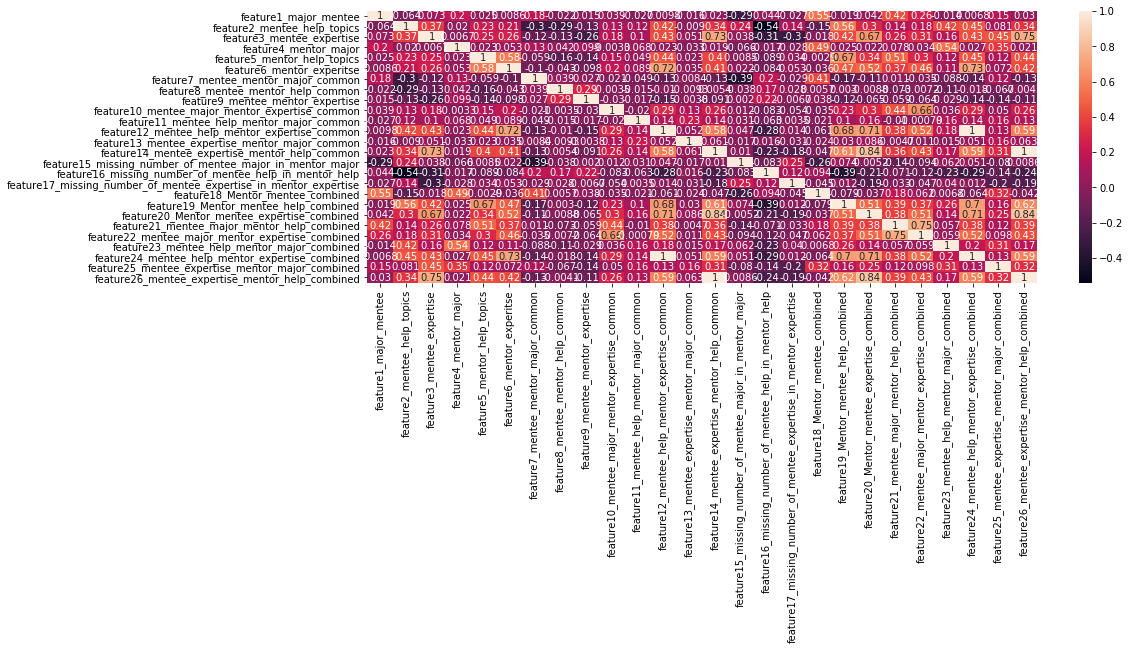

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15 ,5))
sns.heatmap(final.corr(),annot=True)

# Metrics to Consider

# Modelling:-

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final, y, test_size=0.20, random_state=42)

# Checking the balance of Y distribution

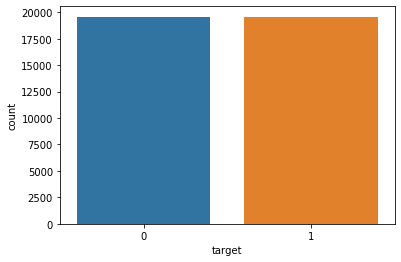

In [266]:
sns.countplot(y_train)

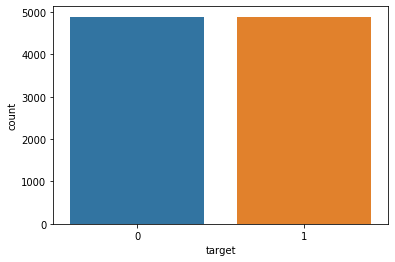

In [280]:
sns.countplot(y_test)

# It is balanced dataset

# Decision Tree 

In [257]:
from sklearn.tree import DecisionTreeClassifier
splitter=['best','random']
max_depth=[20,30,40,None]
min_samples_split=[2,4,6]
min_samples_leaf=[2,4,6,1]
max_features=["auto","sqrt","log2",20,30]
ccp_alpha=[0.0,0.00001,0.001]

In [258]:
parameters=dict(splitter=splitter,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,ccp_alpha=ccp_alpha)

In [259]:
DT_model=DecisionTreeClassifier(criterion='gini')

In [267]:
from sklearn.model_selection import RandomizedSearchCV
crosscvdt=RandomizedSearchCV(estimator=DT_model,param_distributions=parameters,scoring='accuracy',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [268]:
dt_model_cv=crosscvdt.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.8s finished


In [269]:
dt_model_cv.best_params_

{'splitter': 'best',
 'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': None,
 'ccp_alpha': 1e-05}

# Fitting the model with best found parameters:-

In [272]:
DT_model=DecisionTreeClassifier(criterion='gini',
                               splitter= 'best',
 min_samples_split= 6,
 min_samples_leaf= 6,
 max_features='sqrt',
 max_depth= None,
 ccp_alpha=1e-05)

In [273]:
decision_tree_model=DT_model.fit(X_train,y_train)

In [54]:
from sklearn.metrics import accuracy_score

# Train Score

In [281]:
train_predicted_decision_tree=decision_tree_model.predict(X_train)
accuracy_score(y_train,train_predicted_decision_tree)

0.8427822529088352

# Test Score

In [279]:
test_predicted_decision_tree=decision_tree_model.predict(X_test)
accuracy_score(y_test,test_predicted_decision_tree)

0.7187276260611639

In [53]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score

               precision    recall  f1-score   support

Invalid_match       0.72      0.72      0.72      4886
  Valid_Match       0.72      0.71      0.72      4891

     accuracy                           0.72      9777
    macro avg       0.72      0.72      0.72      9777
 weighted avg       0.72      0.72      0.72      9777



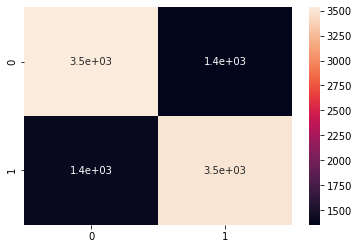

In [292]:
target_names=['Invalid_match','Valid_Match']
print((classification_report(y_test, test_predicted_decision_tree, target_names=target_names)))
sns.heatmap(confusion_matrix(y_test, test_predicted_decision_tree), annot = True)

# Random Forest

# Hyper parameter Tuning

In [56]:
from sklearn.ensemble import RandomForestClassifier
n_estimators=[120, 300, 500, 800, 1200]
max_depth=[5, 8, 15, 25, 30, None]
min_samples_split=[1, 2, 5, 10, 15, 100]
min_samples_leaf=[1, 2, 5, 10]
max_features=[20,30,"auto","sqrt","log2"]
max_leaf_nodes=[None,2,4,8]
ccp_alpha=[0.0,0.00001,0.0001]

In [58]:
parameters_random_forest=dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_features=max_features,max_leaf_nodes=max_leaf_nodes,ccp_alpha=ccp_alpha)

In [60]:
rf_model=RandomForestClassifier(criterion='gini',bootstrap=True,n_jobs=-1,verbose=3)

In [61]:
from sklearn.model_selection import RandomizedSearchCV
randomsearch_random=RandomizedSearchCV(estimator=rf_model,param_distributions=parameters_random_forest,scoring='accuracy',n_jobs=-1,cv=8,verbose=3,return_train_score=True,n_iter=10)

In [62]:
random_forest=randomsearch_random.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  6.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 120
building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120building tree 7 of 120

building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120
building tree 14 of 120
building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120building tree 21 of 120

building tree 22 of 120
building tree 23 of 120
building tree 24 of 120
building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120
building tree 29 of 120
building tree 30 of 120
building tree 31 of 120
building tree 32 of 120


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
building tree 43 of 120building tree 44 of 120

building tree 45 of 120
building tree 46 of 120building tree 47 of 120

building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120building tree 62 of 120

building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120building tree 69 of 120

building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.6s finished


In [63]:
random_forest.best_params_

{'n_estimators': 120,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_leaf_nodes': None,
 'max_features': 'sqrt',
 'max_depth': 30,
 'ccp_alpha': 0.0}

# Fitting with best found parameters:-

In [65]:
rf_model_final=RandomForestClassifier(criterion='gini',bootstrap=True,n_jobs=-1,verbose=3,
                                    n_estimators=120,
 min_samples_split=10,
 min_samples_leaf=5,
 max_leaf_nodes=None,
 max_features='sqrt',
 max_depth=30,
 ccp_alpha=0.0 )

In [67]:
Random_forest_model=rf_model_final.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 120
building tree 2 of 120
building tree 3 of 120
building tree 4 of 120
building tree 5 of 120
building tree 6 of 120
building tree 7 of 120
building tree 8 of 120
building tree 9 of 120
building tree 10 of 120
building tree 11 of 120
building tree 12 of 120
building tree 13 of 120building tree 14 of 120

building tree 15 of 120
building tree 16 of 120
building tree 17 of 120
building tree 18 of 120
building tree 19 of 120
building tree 20 of 120building tree 21 of 120

building tree 22 of 120
building tree 23 of 120building tree 24 of 120

building tree 25 of 120
building tree 26 of 120
building tree 27 of 120
building tree 28 of 120building tree 29 of 120

building tree 30 of 120
building tree 31 of 120
building tree 32 of 120


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 33 of 120
building tree 34 of 120
building tree 35 of 120
building tree 36 of 120
building tree 37 of 120
building tree 38 of 120
building tree 39 of 120
building tree 40 of 120
building tree 41 of 120
building tree 42 of 120
building tree 43 of 120
building tree 44 of 120
building tree 45 of 120
building tree 46 of 120
building tree 47 of 120
building tree 48 of 120
building tree 49 of 120
building tree 50 of 120
building tree 51 of 120
building tree 52 of 120
building tree 53 of 120
building tree 54 of 120
building tree 55 of 120
building tree 56 of 120
building tree 57 of 120
building tree 58 of 120
building tree 59 of 120
building tree 60 of 120
building tree 61 of 120
building tree 62 of 120
building tree 63 of 120
building tree 64 of 120
building tree 65 of 120
building tree 66 of 120
building tree 67 of 120
building tree 68 of 120
building tree 69 of 120
building tree 70 of 120
building tree 71 of 120
building tree 72 of 120
building tree 73 of 120
building tree 74

[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.6s finished


# Training Scores:-

In [68]:
train_predicted_random_forest=Random_forest_model.predict(X_train)
accuracy_score(y_train,train_predicted_random_forest)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.1s finished


0.9122618590973022

# Test Scores:-

In [70]:
test_predicted_random_forest=Random_forest_model.predict(X_test)
accuracy_score(y_test,test_predicted_random_forest)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 120 out of 120 | elapsed:    0.0s finished


0.7794824588319526

               precision    recall  f1-score   support

Invalid_match       0.84      0.69      0.76      4886
  Valid_Match       0.74      0.86      0.80      4891

     accuracy                           0.78      9777
    macro avg       0.79      0.78      0.78      9777
 weighted avg       0.79      0.78      0.78      9777



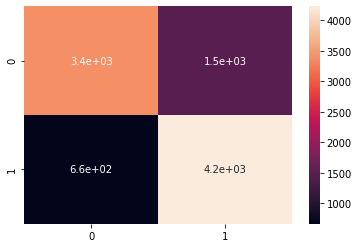

In [71]:
target_names=['Invalid_match','Valid_Match']
print((classification_report(y_test, test_predicted_random_forest, target_names=target_names)))
sns.heatmap(confusion_matrix(y_test, test_predicted_random_forest), annot = True)

# Feature Importance of Random Forests:-

In [96]:
Random_forest_model.feature_importances_

array([0.07941048, 0.18929496, 0.08125635, 0.04759056, 0.04239821,
       0.05383142, 0.007912  , 0.01710047, 0.02006158, 0.00737039,
       0.00061891, 0.00283492, 0.00099521, 0.00506443, 0.01771252,
       0.03636536, 0.02676929, 0.02597607, 0.04357984, 0.03214169,
       0.04592291, 0.03999692, 0.06751417, 0.05980254, 0.02158085,
       0.02689795])

Text(0.5, 0, 'Random Forest Feature Importance')

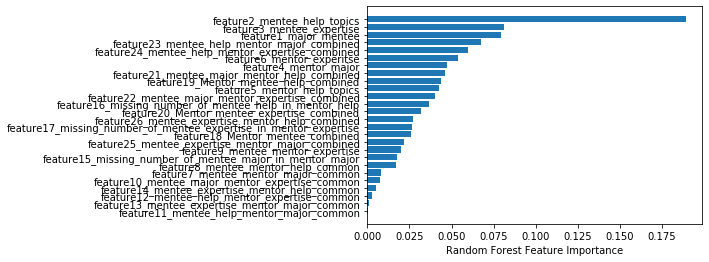

In [99]:
sorted_idx = Random_forest_model.feature_importances_.argsort()
plt.barh(final.columns[sorted_idx], Random_forest_model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# XGBOOST

In [72]:
from xgboost import XGBClassifier

In [73]:
eta=[0.01,0.015, 0.025, 0.05, 0.1]
max_depth=[3, 5, 7, 9, 12, 15, 17, 25]
min_child_weight=[1,3,5,7]
gamma =[0.05-0.1,0.3,0.5,0.7,0.9,1.0]
scale_pos_weight=[0.1,0.5,1]
reg_alpha=[1e-5, 1e-2, 0.1, 1, 100]
learning_rate =[0.0001,0.00001,0.01,1]

In [74]:
parameters_for_xgboost=dict(max_depth=max_depth,min_child_weight=min_child_weight,gamma=gamma,scale_pos_weight=scale_pos_weight,reg_alpha=reg_alpha,learning_rate=learning_rate)

In [75]:
XGB_Model=XGBClassifier(booster='gbtree',verbosity =3,tree_method='gpu_hist')

In [76]:
crosscvXGB=RandomizedSearchCV(estimator=XGB_Model,param_distributions=parameters_for_xgboost,scoring='accuracy',cv=8,verbose=3,return_train_score=True,n_iter=10)

In [77]:
XGB_model=crosscvXGB.fit(X_train,y_train)

Fitting 8 folds for each of 10 candidates, totalling 80 fits
[CV] scale_pos_weight=1, reg_alpha=1, min_child_weight=1, max_depth=15, learning_rate=1e-05, gamma=0.5 
[13:09:33] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[13:09:34] ======== Monitor: SketchContainer ========
[13:09:34] MakeCuts: 0.00203s, 1 calls @ 2030us

[13:09:34] Prune: 0.000986s, 1 calls @ 986us

[13:09:34] Push: 0.000105s, 1 calls @ 105us

[13:09:34] Unique: 0.001102s, 2 calls @ 1102us

[13:09:34] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:09:34] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:09:52] ======== Monitor: Learner ========
[13:09:52] Configure: 0s, 1 calls @ 0us

[13:09:52] GetGradient: 0.007893s, 100 calls @ 7893us

[13:09:52] PredictRaw: 0.889807s, 100 calls @ 889807us

[13:09:52] UpdateOneIter: 18.0311s, 100 calls @ 18031129us

[13:09:52] ======== Monitor: GBTree ========
[13:09:52] BoostNewTrees: 18.2676s, 100 calls @ 18267553us

[13:09:52] CommitModel: 0.022714s, 100 calls @ 22714us

[13:09:52] ======== Device 0 Memory Allocations:  ========
[13:09:52] Peak memory usage: 148MiB
[13:09:52] Number of allocations: 771044
[13:09:52] ======== Monitor: updater_gpu_h

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.5s remaining:    0.0s


[13:09:52] Number of allocations: 771048
[13:09:52] ======== Monitor: updater_gpu_hist ========
[CV] scale_pos_weight=1, reg_alpha=1, min_child_weight=1, max_depth=15, learning_rate=1e-05, gamma=0.5 
[13:09:52] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:09:52] ======== Monitor: SketchContainer ========
[13:09:52] MakeCuts: 0.001001s, 1 calls @ 1001us

[13:09:52] Prune: 0.000426s, 1 calls @ 426us

[13:09:52] Push: 5.9e-05s, 1 calls @ 59us

[13:09:52] Unique: 0.000528s, 2 calls @ 528us

[13:09:52] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:09:52] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:10:11] ======== Monitor: Learner ========
[13:10:11] Configure: 0.000481s, 1 calls @ 481us

[13:10:11] GetGradient: 0.007949s, 100 calls @ 7949us

[13:10:11] PredictRaw: 0.000631s, 100 calls @ 631us

[13:10:11] UpdateOneIter: 18.6431s, 100 calls @ 18643111us

[

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.5s remaining:    0.0s


[13:10:32] ======== Monitor: Learner ========
[13:10:32] Configure: 0.000989s, 1 calls @ 989us

[13:10:32] GetGradient: 0.007911s, 100 calls @ 7911us

[13:10:32] PredictRaw: 0.000627s, 100 calls @ 627us

[13:10:32] UpdateOneIter: 20.0241s, 100 calls @ 20024102us

[13:10:32] ======== Monitor: GBTree ========
[13:10:32] BoostNewTrees: 19.9905s, 100 calls @ 19990474us

[13:10:32] CommitModel: 0.021813s, 100 calls @ 21813us

[13:10:32] ======== Device 0 Memory Allocations:  ========
[13:10:32] Peak memory usage: 148MiB
[13:10:32] Number of allocations: 2323150
[13:10:32] ======== Monitor: updater_gpu_hist ========
[13:10:32] InitData: 0.01296s, 100 calls @ 12960us

[13:10:32] InitDataOnce: 0.012943s, 1 calls @ 12943us

[13:10:32] Update: 19.9896s, 100 calls @ 19989592us

[13:10:32] UpdatePredictionCache: 0.021662s, 100 calls @ 21662us

[13:10:32] ======== Monitor: gradient_based_sampler ========
[13:10:32] Sample: 3.6e-05s, 100 calls @ 36us

[13:10:32] ======== Monitor: GPUHistMakerDevice0

[CV]  scale_pos_weight=1, reg_alpha=1, min_child_weight=1, max_depth=15, learning_rate=1e-05, gamma=0.5, score=(train=0.848, test=0.736), total=  19.5s
[13:11:13] ======== Monitor: Learner ========
[13:11:13] Configure: 0.002337s, 1 calls @ 2337us

[13:11:13] ======== Monitor: GBTree ========
[13:11:13] ======== Device 0 Memory Allocations:  ========
[13:11:13] Peak memory usage: 148MiB
[13:11:13] Number of allocations: 3929006
[13:11:13] ======== Monitor: updater_gpu_hist ========
[CV] scale_pos_weight=1, reg_alpha=1, min_child_weight=1, max_depth=15, learning_rate=1e-05, gamma=0.5 
[13:11:13] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:11:13] ======== Monitor: SketchContainer ========
[13:11:13] MakeCuts: 0.001067s, 1 calls @ 1067us

[13:11:13] Prune: 0.000481s, 1 calls @ 481us

[13:11:13] Push: 4.9e-05s, 1 calls @ 49us

[13:11:13] Unique: 0.000559s, 2 calls @ 559us

[13:11:13] ======== Monitor: xgboo

[CV]  scale_pos_weight=1, reg_alpha=1, min_child_weight=1, max_depth=15, learning_rate=1e-05, gamma=0.5, score=(train=0.851, test=0.751), total=  20.4s
[13:12:14] ======== Monitor: Learner ========
[13:12:14] Configure: 0.000916s, 1 calls @ 916us

[13:12:14] ======== Monitor: GBTree ========
[13:12:14] ======== Device 0 Memory Allocations:  ========
[13:12:14] Peak memory usage: 148MiB
[13:12:14] Number of allocations: 6317897
[13:12:14] ======== Monitor: updater_gpu_hist ========
[CV] scale_pos_weight=0.5, reg_alpha=1e-05, min_child_weight=5, max_depth=5, learning_rate=0.01, gamma=0.5 
[13:12:14] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:12:14] ======== Monitor: SketchContainer ========
[13:12:14] MakeCuts: 0.00169s, 1 calls @ 1690us

[13:12:14] Prune: 0.000763s, 1 calls @ 763us

[13:12:14] Push: 0.0001s, 1 calls @ 100us

[13:12:14] Unique: 0.000875s, 2 calls @ 875us

[13:12:14] ======== Monitor: xgb

[13:12:16] ======== Monitor: SketchContainer ========
[13:12:16] MakeCuts: 0.001435s, 1 calls @ 1435us

[13:12:16] Prune: 0.000626s, 1 calls @ 626us

[13:12:16] Push: 7.5e-05s, 1 calls @ 75us

[13:12:16] Unique: 0.000723s, 2 calls @ 723us

[13:12:16] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:12:16] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:12:17] ======== Monitor: Learner ========
[13:12:17] Configure: 0.000659s, 1 calls @ 659us

[13:12:17] GetGradient: 0.009742s, 100 calls @ 9742us

[13:12:17] PredictRaw: 0.00051s, 100 calls @ 510us

[13:12:17] UpdateOneIter: 0.574029s, 100 calls @ 574029us

[13:12:17] ======== Monitor: GBTree ========
[13:12:17] BoostNewTrees: 0.551227s, 100 calls @ 551227us

[13:12:17] CommitModel: 0.010247s, 100 calls @ 10247us

[13:12:17] ======== Device 0 Memory Allocations:  ========
[13:12:17] Peak memory usage: 148MiB
[13:12:17] Number of allocations: 6361814
[13:12:17] ======== Monitor: updater_gpu

[13:12:18] ======== Monitor: SketchContainer ========
[13:12:18] MakeCuts: 0.001365s, 1 calls @ 1365us

[13:12:18] Prune: 0.000726s, 1 calls @ 726us

[13:12:18] Push: 9.3e-05s, 1 calls @ 93us

[13:12:18] Unique: 0.000773s, 2 calls @ 773us

[13:12:18] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:12:18] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:12:19] ======== Monitor: Learner ========
[13:12:19] Configure: 0.000759s, 1 calls @ 759us

[13:12:19] GetGradient: 0.00809s, 100 calls @ 8090us

[13:12:19] PredictRaw: 0.000583s, 100 calls @ 583us

[13:12:19] UpdateOneIter: 0.520548s, 100 calls @ 520548us

[13:12:19] ======== Monitor: GBTree ========
[13:12:19] BoostNewTrees: 0.500941s, 100 calls @ 500941us

[13:12:19] CommitModel: 0.008718s, 100 calls @ 8718us

[13:12:19] ======== Device 0 Memory Allocations:  ========
[13:12:19] Peak memory usage: 148MiB
[13:12:19] Number of allocations: 6394137
[13:12:19] ======== Monitor: updater_gpu_

[13:12:22] ======== Monitor: SketchContainer ========
[13:12:22] MakeCuts: 0.001662s, 1 calls @ 1662us

[13:12:22] Prune: 0.000801s, 1 calls @ 801us

[13:12:22] Push: 6.6e-05s, 1 calls @ 66us

[13:12:22] Unique: 0.000872s, 2 calls @ 872us

[13:12:22] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:12:22] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:12:23] ======== Monitor: Learner ========
[13:12:23] Configure: 0.000714s, 1 calls @ 714us

[13:12:23] GetGradient: 0.009424s, 100 calls @ 9424us

[13:12:23] PredictRaw: 0.000736s, 100 calls @ 736us

[13:12:23] UpdateOneIter: 1.56225s, 100 calls @ 1562249us

[13:12:23] ======== Monitor: GBTree ========
[13:12:23] BoostNewTrees: 1.53054s, 100 calls @ 1530544us

[13:12:23] CommitModel: 0.018925s, 100 calls @ 18925us

[13:12:23] ======== Device 0 Memory Allocations:  ========
[13:12:23] Peak memory usage: 148MiB
[13:12:23] Number of allocations: 6495884
[13:12:23] ======== Monitor: updater_gp

[13:12:27] MakeCuts: 0.00173s, 1 calls @ 1730us

[13:12:27] Prune: 0.000731s, 1 calls @ 731us

[13:12:27] Push: 9.4e-05s, 1 calls @ 94us

[13:12:27] Unique: 0.000906s, 2 calls @ 906us

[13:12:27] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:12:27] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:12:29] ======== Monitor: Learner ========
[13:12:29] Configure: 0.000612s, 1 calls @ 612us

[13:12:29] GetGradient: 0.009859s, 100 calls @ 9859us

[13:12:29] PredictRaw: 0.000617s, 100 calls @ 617us

[13:12:29] UpdateOneIter: 1.71436s, 100 calls @ 1714358us

[13:12:29] ======== Monitor: GBTree ========
[13:12:29] BoostNewTrees: 1.67968s, 100 calls @ 1679682us

[13:12:29] CommitModel: 0.020386s, 100 calls @ 20386us

[13:12:29] ======== Device 0 Memory Allocations:  ========
[13:12:29] Peak memory usage: 148MiB
[13:12:29] Number of allocations: 6636456
[13:12:29] ======== Monitor: updater_gpu_hist ========
[13:12:29] InitData: 0.013428s, 100 cal

[13:12:32] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:12:33] ======== Monitor: SketchContainer ========
[13:12:33] MakeCuts: 0.001728s, 1 calls @ 1728us

[13:12:33] Prune: 0.000794s, 1 calls @ 794us

[13:12:33] Push: 0.0001s, 1 calls @ 100us

[13:12:33] Unique: 0.000937s, 2 calls @ 937us

[13:12:33] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:12:33] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:12:34] ======== Monitor: Learner ========
[13:12:34] Configure: 0.001254s, 1 calls @ 1254us

[13:12:34] GetGradient: 0.008914s, 100 calls @ 8914us

[13:12:34] PredictRaw: 0.000595s, 100 calls @ 595us

[13:12:34] UpdateOneIter: 1.59563s, 100 calls @ 1595625us

[13:12:34] ======== Monitor: GBTree ========
[13:12:34] BoostNewTrees: 1.56431s, 100 calls @ 1564305us

[13:12:34] CommitModel: 0.01859s, 100 calls @ 18590us

[13:12:34] ======== Device 0 Memory Alloca

[13:12:36] ======== Monitor: Learner ========
[13:12:36] Configure: 0.001017s, 1 calls @ 1017us

[13:12:36] GetGradient: 0.008841s, 100 calls @ 8841us

[13:12:36] PredictRaw: 0.000629s, 100 calls @ 629us

[13:12:36] UpdateOneIter: 0.316451s, 100 calls @ 316451us

[13:12:36] ======== Monitor: GBTree ========
[13:12:36] BoostNewTrees: 0.293484s, 100 calls @ 293484us

[13:12:36] CommitModel: 0.010987s, 100 calls @ 10987us

[13:12:36] ======== Device 0 Memory Allocations:  ========
[13:12:36] Peak memory usage: 148MiB
[13:12:36] Number of allocations: 6795060
[13:12:36] ======== Monitor: updater_gpu_hist ========
[13:12:36] InitData: 0.01438s, 100 calls @ 14380us

[13:12:36] InitDataOnce: 0.014368s, 1 calls @ 14368us

[13:12:36] Update: 0.292735s, 100 calls @ 292735us

[13:12:36] UpdatePredictionCache: 0.010901s, 100 calls @ 10901us

[13:12:36] ======== Monitor: gradient_based_sampler ========
[13:12:36] Sample: 2.4e-05s, 100 calls @ 24us

[13:12:36] ======== Monitor: GPUHistMakerDevice0 =

[13:12:37] ======== Monitor: Learner ========
[13:12:37] Configure: 0.000947s, 1 calls @ 947us

[13:12:37] GetGradient: 0.008438s, 100 calls @ 8438us

[13:12:37] PredictRaw: 0.000539s, 100 calls @ 539us

[13:12:37] UpdateOneIter: 0.310455s, 100 calls @ 310455us

[13:12:37] ======== Monitor: GBTree ========
[13:12:37] BoostNewTrees: 0.288117s, 100 calls @ 288117us

[13:12:37] CommitModel: 0.010991s, 100 calls @ 10991us

[13:12:37] ======== Device 0 Memory Allocations:  ========
[13:12:37] Peak memory usage: 148MiB
[13:12:37] Number of allocations: 6810928
[13:12:37] ======== Monitor: updater_gpu_hist ========
[13:12:37] InitData: 0.013011s, 100 calls @ 13011us

[13:12:37] InitDataOnce: 0.012999s, 1 calls @ 12999us

[13:12:37] Update: 0.287385s, 100 calls @ 287385us

[13:12:37] UpdatePredictionCache: 0.010906s, 100 calls @ 10906us

[13:12:37] ======== Monitor: gradient_based_sampler ========
[13:12:37] Sample: 2.1e-05s, 100 calls @ 21us

[13:12:37] ======== Monitor: GPUHistMakerDevice0 =

[13:12:38] ======== Monitor: Learner ========
[13:12:38] Configure: 0.000911s, 1 calls @ 911us

[13:12:38] GetGradient: 0.010241s, 100 calls @ 10241us

[13:12:38] PredictRaw: 0.00059s, 100 calls @ 590us

[13:12:38] UpdateOneIter: 0.205952s, 100 calls @ 205952us

[13:12:38] ======== Monitor: GBTree ========
[13:12:38] BoostNewTrees: 0.18292s, 100 calls @ 182920us

[13:12:38] CommitModel: 0.008839s, 100 calls @ 8839us

[13:12:38] ======== Device 0 Memory Allocations:  ========
[13:12:38] Peak memory usage: 148MiB
[13:12:38] Number of allocations: 6823874
[13:12:38] ======== Monitor: updater_gpu_hist ========
[13:12:38] InitData: 0.013361s, 100 calls @ 13361us

[13:12:38] InitDataOnce: 0.013345s, 1 calls @ 13345us

[13:12:38] Update: 0.181204s, 100 calls @ 181204us

[13:12:38] UpdatePredictionCache: 0.008712s, 100 calls @ 8712us

[13:12:38] ======== Monitor: gradient_based_sampler ========
[13:12:38] Sample: 2.9e-05s, 100 calls @ 29us

[13:12:38] ======== Monitor: GPUHistMakerDevice0 ====

[13:12:39] ======== Monitor: Learner ========
[13:12:39] Configure: 0.000614s, 1 calls @ 614us

[13:12:39] GetGradient: 0.009794s, 100 calls @ 9794us

[13:12:39] PredictRaw: 0.000773s, 100 calls @ 773us

[13:12:39] UpdateOneIter: 0.182709s, 100 calls @ 182709us

[13:12:39] ======== Monitor: GBTree ========
[13:12:39] BoostNewTrees: 0.162655s, 100 calls @ 162655us

[13:12:39] CommitModel: 0.006982s, 100 calls @ 6982us

[13:12:39] ======== Device 0 Memory Allocations:  ========
[13:12:39] Peak memory usage: 148MiB
[13:12:39] Number of allocations: 6827980
[13:12:39] ======== Monitor: updater_gpu_hist ========
[13:12:39] InitData: 0.014086s, 100 calls @ 14086us

[13:12:39] InitDataOnce: 0.014074s, 1 calls @ 14074us

[13:12:39] Update: 0.161899s, 100 calls @ 161899us

[13:12:39] UpdatePredictionCache: 0.006905s, 100 calls @ 6905us

[13:12:39] ======== Monitor: gradient_based_sampler ========
[13:12:39] Sample: 2e-05s, 100 calls @ 20us

[13:12:39] ======== Monitor: GPUHistMakerDevice0 =====

[13:12:40] ======== Monitor: Learner ========
[13:12:40] Configure: 0.001135s, 1 calls @ 1135us

[13:12:40] GetGradient: 0.009036s, 100 calls @ 9036us

[13:12:40] PredictRaw: 0.000532s, 100 calls @ 532us

[13:12:40] UpdateOneIter: 0.181377s, 100 calls @ 181377us

[13:12:40] ======== Monitor: GBTree ========
[13:12:40] BoostNewTrees: 0.16223s, 100 calls @ 162230us

[13:12:40] CommitModel: 0.006996s, 100 calls @ 6996us

[13:12:40] ======== Device 0 Memory Allocations:  ========
[13:12:40] Peak memory usage: 148MiB
[13:12:40] Number of allocations: 6832058
[13:12:40] ======== Monitor: updater_gpu_hist ========
[13:12:40] InitData: 0.013963s, 100 calls @ 13963us

[13:12:40] InitDataOnce: 0.013952s, 1 calls @ 13952us

[13:12:40] Update: 0.161471s, 100 calls @ 161471us

[13:12:40] UpdatePredictionCache: 0.006922s, 100 calls @ 6922us

[13:12:40] ======== Monitor: gradient_based_sampler ========
[13:12:40] Sample: 2e-05s, 100 calls @ 20us

[13:12:40] ======== Monitor: GPUHistMakerDevice0 =====

[13:12:43] ======== Monitor: Learner ========
[13:12:43] Configure: 0.001179s, 1 calls @ 1179us

[13:12:43] GetGradient: 0.010382s, 100 calls @ 10382us

[13:12:43] PredictRaw: 0.000656s, 100 calls @ 656us

[13:12:43] UpdateOneIter: 1.20105s, 100 calls @ 1201050us

[13:12:43] ======== Monitor: GBTree ========
[13:12:43] BoostNewTrees: 1.17288s, 100 calls @ 1172885us

[13:12:43] CommitModel: 0.014134s, 100 calls @ 14134us

[13:12:43] ======== Device 0 Memory Allocations:  ========
[13:12:43] Peak memory usage: 148MiB
[13:12:43] Number of allocations: 6910641
[13:12:43] ======== Monitor: updater_gpu_hist ========
[13:12:43] InitData: 0.013603s, 100 calls @ 13603us

[13:12:43] InitDataOnce: 0.01359s, 1 calls @ 13590us

[13:12:43] Update: 1.17203s, 100 calls @ 1172032us

[13:12:43] UpdatePredictionCache: 0.014033s, 100 calls @ 14033us

[13:12:43] ======== Monitor: gradient_based_sampler ========
[13:12:43] Sample: 2.8e-05s, 100 calls @ 28us

[13:12:43] ======== Monitor: GPUHistMakerDevice0 

[13:12:46] MakeCuts: 0.001572s, 1 calls @ 1572us

[13:12:46] Prune: 0.000719s, 1 calls @ 719us

[13:12:46] Push: 0.000107s, 1 calls @ 107us

[13:12:46] Unique: 0.000811s, 2 calls @ 811us

[13:12:46] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:12:46] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:12:48] ======== Monitor: Learner ========
[13:12:48] Configure: 0.001079s, 1 calls @ 1079us

[13:12:48] GetGradient: 0.008039s, 100 calls @ 8039us

[13:12:48] PredictRaw: 0.000643s, 100 calls @ 643us

[13:12:48] UpdateOneIter: 1.27437s, 100 calls @ 1274374us

[13:12:48] ======== Monitor: GBTree ========
[13:12:48] BoostNewTrees: 1.2521s, 100 calls @ 1252100us

[13:12:48] CommitModel: 0.01105s, 100 calls @ 11050us

[13:12:48] ======== Device 0 Memory Allocations:  ========
[13:12:48] Peak memory usage: 148MiB
[13:12:48] Number of allocations: 7030941
[13:12:48] ======== Monitor: updater_gpu_hist ========
[13:12:48] InitData: 0.014441s, 100 c

[13:12:51] ======== Monitor: SketchContainer ========
[13:12:51] MakeCuts: 0.001404s, 1 calls @ 1404us

[13:12:51] Prune: 0.000743s, 1 calls @ 743us

[13:12:51] Push: 9.8e-05s, 1 calls @ 98us

[13:12:51] Unique: 0.00079s, 2 calls @ 790us

[13:12:51] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:12:51] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:12:52] ======== Monitor: Learner ========
[13:12:52] Configure: 0.000921s, 1 calls @ 921us

[13:12:52] GetGradient: 0.008489s, 100 calls @ 8489us

[13:12:52] PredictRaw: 0.000622s, 100 calls @ 622us

[13:12:52] UpdateOneIter: 1.05367s, 100 calls @ 1053672us

[13:12:52] ======== Monitor: GBTree ========
[13:12:52] BoostNewTrees: 1.03024s, 100 calls @ 1030244us

[13:12:52] CommitModel: 0.011601s, 100 calls @ 11601us

[13:12:52] ======== Device 0 Memory Allocations:  ========
[13:12:52] Peak memory usage: 148MiB
[13:12:52] Number of allocations: 7145880
[13:12:52] ======== Monitor: updater_gpu

[13:13:33] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:13:33] ======== Monitor: SketchContainer ========
[13:13:33] MakeCuts: 0.001614s, 1 calls @ 1614us

[13:13:33] Prune: 0.000789s, 1 calls @ 789us

[13:13:33] Push: 8.5e-05s, 1 calls @ 85us

[13:13:33] Unique: 0.000864s, 2 calls @ 864us

[13:13:33] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:13:33] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:13:54] ======== Monitor: Learner ========
[13:13:54] Configure: 0.000683s, 1 calls @ 683us

[13:13:54] GetGradient: 0.012567s, 100 calls @ 12567us

[13:13:54] PredictRaw: 0.000951s, 100 calls @ 951us

[13:13:54] UpdateOneIter: 20.2147s, 100 calls @ 20214653us

[13:13:54] ======== Monitor: GBTree ========
[13:13:54] BoostNewTrees: 8.69656s, 100 calls @ 8696562us

[13:13:54] CommitModel: 11.5014s, 100 calls @ 11501353us

[13:13:54] ======== Device 0 Memory Al

[CV]  scale_pos_weight=1, reg_alpha=1e-05, min_child_weight=1, max_depth=25, learning_rate=1, gamma=0.3, score=(train=0.995, test=0.769), total=  21.6s
[13:14:37] ======== Monitor: Learner ========
[13:14:37] Configure: 0.002002s, 1 calls @ 2002us

[13:14:37] ======== Monitor: GBTree ========
[13:14:37] ======== Device 0 Memory Allocations:  ========
[13:14:37] Peak memory usage: 709MiB
[13:14:37] Number of allocations: 7574095
[13:14:37] ======== Monitor: updater_gpu_hist ========
[CV] scale_pos_weight=1, reg_alpha=1e-05, min_child_weight=1, max_depth=25, learning_rate=1, gamma=0.3 
[13:14:37] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:14:37] ======== Monitor: SketchContainer ========
[13:14:37] MakeCuts: 0.001862s, 1 calls @ 1862us

[13:14:37] Prune: 0.000827s, 1 calls @ 827us

[13:14:37] Push: 9.4e-05s, 1 calls @ 94us

[13:14:37] Unique: 0.000971s, 2 calls @ 971us

[13:14:37] ======== Monitor: xgboo

[13:15:41] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:15:41] ======== Monitor: SketchContainer ========
[13:15:41] MakeCuts: 0.001247s, 1 calls @ 1247us

[13:15:41] Prune: 0.000546s, 1 calls @ 546us

[13:15:41] Push: 6.4e-05s, 1 calls @ 64us

[13:15:41] Unique: 0.000639s, 2 calls @ 639us

[13:15:41] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:15:41] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:15:41] ======== Monitor: Learner ========
[13:15:41] Configure: 0.00067s, 1 calls @ 670us

[13:15:41] GetGradient: 0.00906s, 100 calls @ 9060us

[13:15:41] PredictRaw: 0.000625s, 100 calls @ 625us

[13:15:41] UpdateOneIter: 0.30032s, 100 calls @ 300320us

[13:15:41] ======== Monitor: GBTree ========
[13:15:41] BoostNewTrees: 0.279994s, 100 calls @ 279994us

[13:15:41] CommitModel: 0.008254s, 100 calls @ 8254us

[13:15:41] ======== Device 0 Memory Allocation

[13:15:42] MakeCuts: 0.001418s, 1 calls @ 1418us

[13:15:42] Prune: 0.000734s, 1 calls @ 734us

[13:15:42] Push: 5.8e-05s, 1 calls @ 58us

[13:15:42] Unique: 0.00081s, 2 calls @ 810us

[13:15:42] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:15:42] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:15:42] ======== Monitor: Learner ========
[13:15:42] Configure: 0.000691s, 1 calls @ 691us

[13:15:42] GetGradient: 0.010145s, 100 calls @ 10145us

[13:15:42] PredictRaw: 0.00053s, 100 calls @ 530us

[13:15:42] UpdateOneIter: 0.325365s, 100 calls @ 325365us

[13:15:42] ======== Monitor: GBTree ========
[13:15:42] BoostNewTrees: 0.303149s, 100 calls @ 303149us

[13:15:42] CommitModel: 0.008932s, 100 calls @ 8932us

[13:15:42] ======== Device 0 Memory Allocations:  ========
[13:15:42] Peak memory usage: 709MiB
[13:15:42] Number of allocations: 7856619
[13:15:42] ======== Monitor: updater_gpu_hist ========
[13:15:42] InitData: 0.012219s, 100 call

[13:15:44] ======== Monitor: Learner ========
[13:15:44] Configure: 0.000755s, 1 calls @ 755us

[13:15:44] GetGradient: 0.009355s, 100 calls @ 9355us

[13:15:44] PredictRaw: 0.000572s, 100 calls @ 572us

[13:15:44] UpdateOneIter: 0.312819s, 100 calls @ 312819us

[13:15:44] ======== Monitor: GBTree ========
[13:15:44] BoostNewTrees: 0.292918s, 100 calls @ 292918us

[13:15:44] CommitModel: 0.007733s, 100 calls @ 7733us

[13:15:44] ======== Device 0 Memory Allocations:  ========
[13:15:44] Peak memory usage: 709MiB
[13:15:44] Number of allocations: 7870842
[13:15:44] ======== Monitor: updater_gpu_hist ========
[13:15:44] InitData: 0.014015s, 100 calls @ 14015us

[13:15:44] InitDataOnce: 0.014s, 1 calls @ 14000us

[13:15:44] Update: 0.292146s, 100 calls @ 292146us

[13:15:44] UpdatePredictionCache: 0.007651s, 100 calls @ 7651us

[13:15:44] ======== Monitor: gradient_based_sampler ========
[13:15:44] Sample: 2.2e-05s, 100 calls @ 22us

[13:15:44] ======== Monitor: GPUHistMakerDevice0 ======

[13:15:46] ======== Monitor: Learner ========
[13:15:46] Configure: 0.001056s, 1 calls @ 1056us

[13:15:46] GetGradient: 0.008094s, 100 calls @ 8094us

[13:15:46] PredictRaw: 0.000528s, 100 calls @ 528us

[13:15:46] UpdateOneIter: 0.475042s, 100 calls @ 475042us

[13:15:46] ======== Monitor: GBTree ========
[13:15:46] BoostNewTrees: 0.456518s, 100 calls @ 456518us

[13:15:46] CommitModel: 0.007355s, 100 calls @ 7355us

[13:15:46] ======== Device 0 Memory Allocations:  ========
[13:15:46] Peak memory usage: 709MiB
[13:15:46] Number of allocations: 7900066
[13:15:46] ======== Monitor: updater_gpu_hist ========
[13:15:46] InitData: 0.014354s, 100 calls @ 14354us

[13:15:46] InitDataOnce: 0.014341s, 1 calls @ 14341us

[13:15:46] Update: 0.455763s, 100 calls @ 455763us

[13:15:46] UpdatePredictionCache: 0.007278s, 100 calls @ 7278us

[13:15:46] ======== Monitor: gradient_based_sampler ========
[13:15:46] Sample: 2.2e-05s, 100 calls @ 22us

[13:15:46] ======== Monitor: GPUHistMakerDevice0 ==

[13:15:47] ======== Monitor: SketchContainer ========
[13:15:47] MakeCuts: 0.001597s, 1 calls @ 1597us

[13:15:47] Prune: 0.000573s, 1 calls @ 573us

[13:15:47] Push: 6.6e-05s, 1 calls @ 66us

[13:15:47] Unique: 0.000813s, 2 calls @ 813us

[13:15:47] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:15:47] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:15:48] ======== Monitor: Learner ========
[13:15:48] Configure: 0.001168s, 1 calls @ 1168us

[13:15:48] GetGradient: 0.00837s, 100 calls @ 8370us

[13:15:48] PredictRaw: 0.000505s, 100 calls @ 505us

[13:15:48] UpdateOneIter: 0.583736s, 100 calls @ 583736us

[13:15:48] ======== Monitor: GBTree ========
[13:15:48] BoostNewTrees: 0.564628s, 100 calls @ 564628us

[13:15:48] CommitModel: 0.007553s, 100 calls @ 7553us

[13:15:48] ======== Device 0 Memory Allocations:  ========
[13:15:48] Peak memory usage: 709MiB
[13:15:48] Number of allocations: 7939405
[13:15:48] ======== Monitor: updater_gpu

[13:15:49] MakeCuts: 0.001831s, 1 calls @ 1831us

[13:15:49] Prune: 0.00089s, 1 calls @ 890us

[13:15:49] Push: 0.000101s, 1 calls @ 101us

[13:15:49] Unique: 0.000986s, 2 calls @ 986us

[13:15:49] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:15:49] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:15:50] ======== Monitor: Learner ========
[13:15:50] Configure: 0.000733s, 1 calls @ 733us

[13:15:50] GetGradient: 0.010635s, 100 calls @ 10635us

[13:15:50] PredictRaw: 0.000704s, 100 calls @ 704us

[13:15:50] UpdateOneIter: 0.602168s, 100 calls @ 602168us

[13:15:50] ======== Monitor: GBTree ========
[13:15:50] BoostNewTrees: 0.57988s, 100 calls @ 579880us

[13:15:50] CommitModel: 0.008509s, 100 calls @ 8509us

[13:15:50] ======== Device 0 Memory Allocations:  ========
[13:15:50] Peak memory usage: 709MiB
[13:15:50] Number of allocations: 7979319
[13:15:50] ======== Monitor: updater_gpu_hist ========
[13:15:50] InitData: 0.01504s, 100 cal

[13:15:53] ======== Monitor: SketchContainer ========
[13:15:53] MakeCuts: 0.00165s, 1 calls @ 1650us

[13:15:53] Prune: 0.000824s, 1 calls @ 824us

[13:15:53] Push: 0.000116s, 1 calls @ 116us

[13:15:53] Unique: 0.000909s, 2 calls @ 909us

[13:15:53] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:15:53] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:15:54] ======== Monitor: Learner ========
[13:15:54] Configure: 0.000795s, 1 calls @ 795us

[13:15:54] GetGradient: 0.00885s, 100 calls @ 8850us

[13:15:54] PredictRaw: 0.000534s, 100 calls @ 534us

[13:15:54] UpdateOneIter: 1.20713s, 100 calls @ 1207130us

[13:15:54] ======== Monitor: GBTree ========
[13:15:54] BoostNewTrees: 1.18635s, 100 calls @ 1186346us

[13:15:54] CommitModel: 0.008888s, 100 calls @ 8888us

[13:15:54] ======== Device 0 Memory Allocations:  ========
[13:15:54] Peak memory usage: 709MiB
[13:15:54] Number of allocations: 8081816
[13:15:54] ======== Monitor: updater_gpu

[13:15:57] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:15:57] ======== Monitor: SketchContainer ========
[13:15:57] MakeCuts: 0.001586s, 1 calls @ 1586us

[13:15:57] Prune: 0.000532s, 1 calls @ 532us

[13:15:57] Push: 5.8e-05s, 1 calls @ 58us

[13:15:57] Unique: 0.000632s, 2 calls @ 632us

[13:15:57] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:15:57] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:15:59] ======== Monitor: Learner ========
[13:15:59] Configure: 0.001207s, 1 calls @ 1207us

[13:15:59] GetGradient: 0.009163s, 100 calls @ 9163us

[13:15:59] PredictRaw: 0.000626s, 100 calls @ 626us

[13:15:59] UpdateOneIter: 1.26167s, 100 calls @ 1261667us

[13:15:59] ======== Monitor: GBTree ========
[13:15:59] BoostNewTrees: 1.23915s, 100 calls @ 1239150us

[13:15:59] CommitModel: 0.009605s, 100 calls @ 9605us

[13:15:59] ======== Device 0 Memory Alloca

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  6.5min finished



[13:16:02] ======== Monitor: SketchContainer ========
[13:16:02] MakeCuts: 0.002863s, 1 calls @ 2863us

[13:16:02] Prune: 0.001415s, 1 calls @ 1415us

[13:16:02] Push: 0.000163s, 1 calls @ 163us

[13:16:02] Unique: 0.00154s, 2 calls @ 1540us

[13:16:02] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:16:02] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:16:22] ======== Monitor: Learner ========
[13:16:22] Configure: 0.001331s, 1 calls @ 1331us

[13:16:22] GetGradient: 0.010664s, 100 calls @ 10664us

[13:16:22] PredictRaw: 0.00086s, 100 calls @ 860us

[13:16:22] UpdateOneIter: 20.527s, 100 calls @ 20526981us

[13:16:22] ======== Monitor: GBTree ========
[13:16:22] BoostNewTrees: 8.98661s, 100 calls @ 8986608us

[13:16:22] CommitModel: 11.5248s, 100 calls @ 11524830us

[13:16:22] ======== Device 0 Memory Allocations:  ========
[13:16:22] Peak memory usage: 709MiB
[13:16:22] Number of allocations: 8347453
[13:16:22] ======== Monitor: upd

In [78]:
XGB_model.best_params_

{'scale_pos_weight': 1,
 'reg_alpha': 1e-05,
 'min_child_weight': 1,
 'max_depth': 25,
 'learning_rate': 1,
 'gamma': 0.3}

# Fitting with the best Parameters:-

In [80]:
XGB_Model_final=XGBClassifier(booster='gbtree',verbosity =3,tree_method='gpu_hist',
                            scale_pos_weight=1,
 reg_alpha=1e-05,
 min_child_weight=1,
 max_depth=25,
 learning_rate=1,
 gamma=0.3 )

In [81]:
XGB=XGB_Model_final.fit(X_train,y_train)

[13:18:51] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:18:51] ======== Monitor: SketchContainer ========
[13:18:51] MakeCuts: 0.001152s, 1 calls @ 1152us

[13:18:51] Prune: 0.000611s, 1 calls @ 611us

[13:18:51] Push: 8.6e-05s, 1 calls @ 86us

[13:18:51] Unique: 0.000688s, 2 calls @ 688us

[13:18:51] ======== Monitor: xgboost::common::DenseCuts::DenseCuts ========
[13:18:51] ======== Monitor: xgboost::common::HistogramCuts::HistogramCuts ========
[13:19:12] ======== Monitor: Learner ========
[13:19:12] Configure: 0.000518s, 1 calls @ 518us

[13:19:12] GetGradient: 0.013804s, 100 calls @ 13804us

[13:19:12] PredictRaw: 0.022861s, 100 calls @ 22861us

[13:19:12] UpdateOneIter: 21.164s, 100 calls @ 21164001us

[13:19:12] ======== Monitor: GBTree ========
[13:19:12] BoostNewTrees: 9.29152s, 100 calls @ 9291516us

[13:19:12] CommitModel: 11.8329s, 100 calls @ 11832910us

[13:19:12] ======== Device 0 Memory A

# Train Scores:-

In [82]:
train_predicted_XGB=XGB.predict(X_train)
accuracy_score(y_train,train_predicted_XGB)

[13:19:32] DEBUG: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/tree/updater_gpu_hist.cu:827: [GPU Hist]: Configure
[13:19:32] ======== Device 0 Memory Allocations:  ========
[13:19:32] Peak memory usage: 709MiB
[13:19:32] Number of allocations: 8443366
[13:19:32] ======== Monitor:  ========


0.9941183991816903

# Test Scores:-

In [83]:
test_predicted_XGB=XGB.predict(X_test)
accuracy_score(y_test,test_predicted_XGB)

0.7644471719341311

               precision    recall  f1-score   support

Invalid_match       0.78      0.74      0.76      4886
  Valid_Match       0.75      0.79      0.77      4891

     accuracy                           0.76      9777
    macro avg       0.77      0.76      0.76      9777
 weighted avg       0.77      0.76      0.76      9777



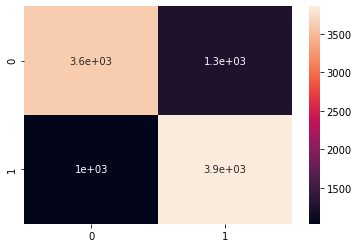

In [84]:
target_names=['Invalid_match','Valid_Match']
print((classification_report(y_test, test_predicted_XGB, target_names=target_names)))
sns.heatmap(confusion_matrix(y_test, test_predicted_XGB), annot = True)

# Feature Importance according to XGBOOST Model

In [100]:
XGB.feature_importances_

array([0.03228309, 0.11638458, 0.04336214, 0.01941306, 0.01954732,
       0.02577944, 0.02212933, 0.01826843, 0.01924053, 0.02978883,
       0.01988192, 0.0137402 , 0.02369122, 0.26805875, 0.02377576,
       0.01872368, 0.02082816, 0.01937313, 0.02129236, 0.08617054,
       0.03217229, 0.02112157, 0.02345367, 0.02272504, 0.01794182,
       0.02085311], dtype=float32)

Text(0.5, 0, 'XGBOOST Feature Importance')

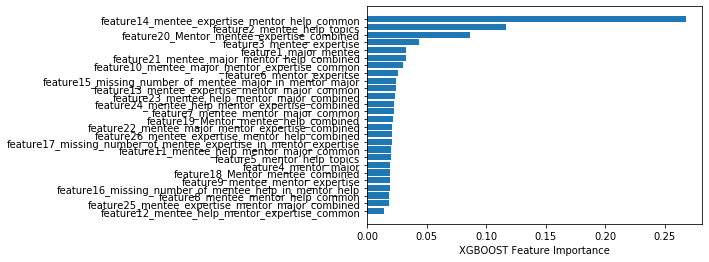

In [101]:
sorted_idx = XGB.feature_importances_.argsort()
plt.barh(final.columns[sorted_idx], XGB.feature_importances_[sorted_idx])
plt.xlabel("XGBOOST Feature Importance")

# Neural Network

In [154]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout

In [177]:
input_shape = (26,)
MLP_Model=Sequential()
MLP_Model.add(Dense(100, input_shape=input_shape, activation='relu'))
MLP_Model.add(Dense(150, activation='relu'))
MLP_Model.add(Dense(200, activation='relu'))
MLP_Model.add(Dense(250, activation='relu'))
MLP_Model.add(Dense(300, activation='relu'))
MLP_Model.add(Dense(1, activation='sigmoid'))

In [178]:
MLP_Model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 100)               2700      
_________________________________________________________________
dense_38 (Dense)             (None, 150)               15150     
_________________________________________________________________
dense_39 (Dense)             (None, 200)               30200     
_________________________________________________________________
dense_40 (Dense)             (None, 250)               50250     
_________________________________________________________________
dense_41 (Dense)             (None, 300)               75300     
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 301       
Total params: 173,901
Trainable params: 173,901
Non-trainable params: 0
________________________________________________

In [179]:
MLP_Model.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['Accuracy'])

In [197]:
final_normalized=final.copy()

In [198]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(final_normalized, y, test_size=0.20, random_state=42)

In [199]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_new = sc.fit_transform(X_train_new)
X_test_new = sc.transform (X_test_new)

In [201]:
Final_NN_model_standardized=MLP_Model.fit(X_train_new, y_train_new, epochs=100, batch_size=20, verbose=3, validation_split=0.2)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [204]:
predicted_standard=MLP_Model.predict(X_train_new)

# Train Scores of Neural Network

In [207]:
neural_predicted_list_train1=[]
for i in predicted_standard:
    if(i>0.50):
        neural_predicted_list_train1.append(int(1))
    else:
         neural_predicted_list_train1.append(int(0))

accuracy_score(y_train_new,neural_predicted_list_train1)

0.7653496995269147

# Test Scores of Neural Network

In [208]:
predicted_standard_test=MLP_Model.predict(X_test_new)
neural_predicted_list_test1=[]
for i in predicted_standard_test:
    if(i>0.50):
        neural_predicted_list_test1.append(int(1))
    else:
         neural_predicted_list_test1.append(int(0))

accuracy_score(y_test_new,neural_predicted_list_test1)

0.7159660427534008

               precision    recall  f1-score   support

Invalid_match       0.81      0.57      0.67      4886
  Valid_Match       0.67      0.87      0.75      4891

     accuracy                           0.72      9777
    macro avg       0.74      0.72      0.71      9777
 weighted avg       0.74      0.72      0.71      9777



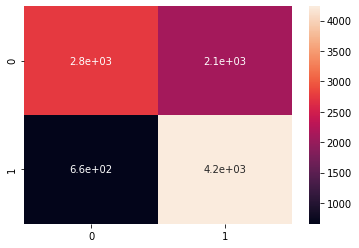

In [209]:
target_names=['Invalid_match','Valid_Match']
print((classification_report(y_test, neural_predicted_list_test1, target_names=target_names)))
sns.heatmap(confusion_matrix(y_test, neural_predicted_list_test1), annot = True)

# save the model to disk

In [211]:
import pickle
filename = r'C:\Users\91996\Desktop\ML\PeopleGroove\finalized_model.pkl'
pickle.dump(XGB, open(filename, 'wb'))

# Building an Front End Application to use the model using Streamlit

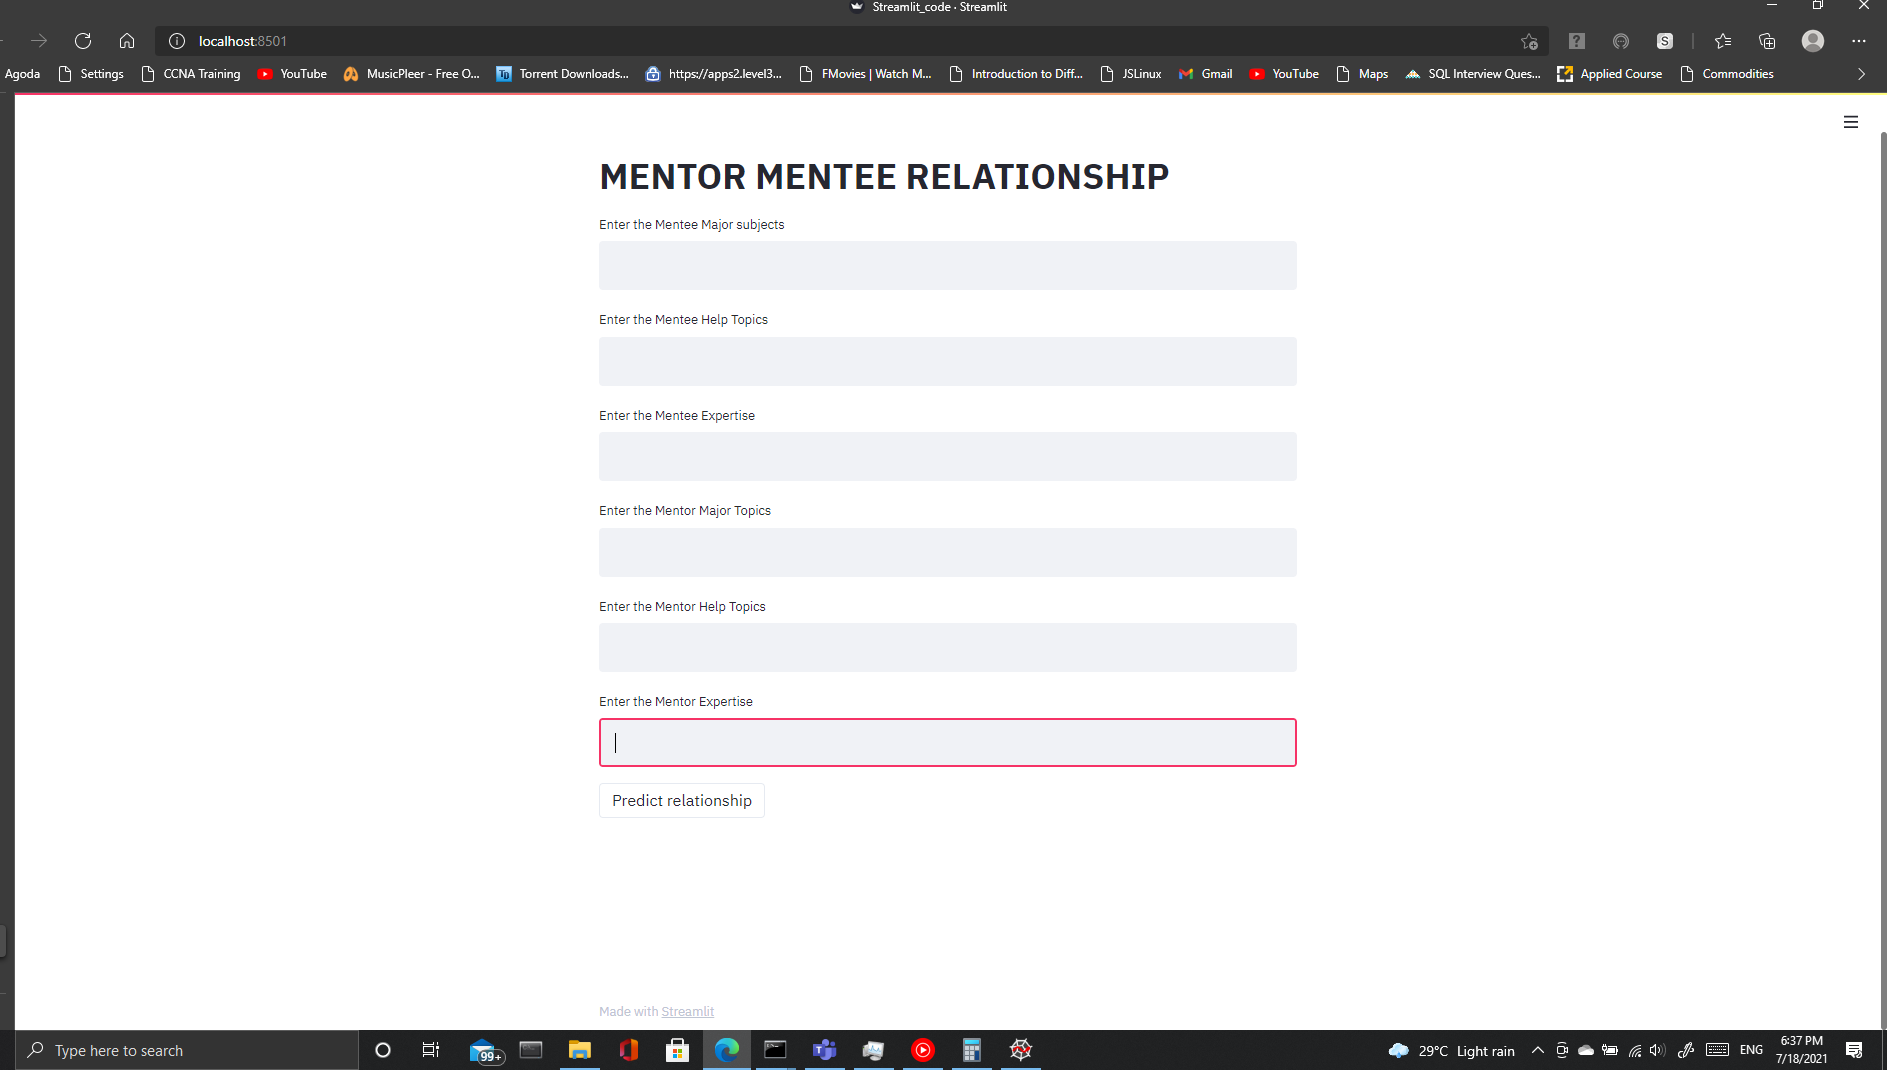

# The same can be deployed on AWS EC2 instance or HEROKU.